In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
#Import both csv from raw_data folder
csvpath = 'raw_data/city_data.csv'
csvpath2 = 'raw_data/ride_data.csv'
cityRaw = pd.read_csv(csvpath)
rideRaw = pd.read_csv(csvpath2)
print(cityRaw.head()) 
print('--------------------------------')
print(rideRaw.head())

             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban
--------------------------------
          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673


In [3]:
#Average Fare ($) Per City
rideCityGroupby = rideRaw.groupby('city')
cityAvgFare = rideCityGroupby['fare'].mean()
cityAvgFare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [4]:
#Total Number of Rides Per City
cityNumRide = rideCityGroupby['ride_id'].count()
cityNumRide.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [5]:
#Total Number of Drivers Per City
#Check if there are duplicates in city in cityRaw
#print(cityRaw['city'].value_counts())

#Since there are duplicates then groupby
cityGroupby = cityRaw.groupby('city')
cityNumDrivers = cityGroupby['driver_count'].sum()
cityNumDrivers.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [6]:
#Combine all averages into the table 
combinedAvg = pd.concat([cityNumDrivers,cityNumRide,cityAvgFare], axis=1).reset_index()
combinedAvg = combinedAvg.rename(columns ={'driver_count':'total_drivers','ride_id':'total_rides','fare':'avg_fare'})
combinedAvg.head()


,city,total_drivers,total_rides,avg_fare
0,Alvarezhaven,21,31,23.928710
1,Alyssaberg,67,26,20.609615
2,Anitamouth,16,9,37.315556
3,Antoniomouth,21,22,23.625000
4,Aprilchester,49,19,21.981579


In [7]:
#Classify City Type -Urban, Suburban, Rural
#Groupby city and city type
cityTypeGroupby = cityRaw.groupby(['city','type']).count()
cityTypeGroupby = cityTypeGroupby.reset_index()
cityTypeGroupby.head()

#Merge the two tables, combinedAvg and cityTypeGroupby
finalTable = combinedAvg.merge(cityTypeGroupby, how ='left', on='city')
finalTable.drop('driver_count',axis=1,inplace=True)
finalTable.head()


,city,total_drivers,total_rides,avg_fare,type
0,Alvarezhaven,21,31,23.928710,Urban
1,Alyssaberg,67,26,20.609615,Urban
2,Anitamouth,16,9,37.315556,Suburban
3,Antoniomouth,21,22,23.625000,Urban
4,Aprilchester,49,19,21.981579,Urban


In [8]:
#Split the table into 3 city type tables
typeIndexTable = finalTable.set_index('type')
urbanFinalTable = typeIndexTable.loc['Urban']
suburbanFinalTable = typeIndexTable.loc['Suburban']
ruralFinalTable = typeIndexTable.loc['Rural']


Text(0,0.5,'Average Fare ($)')

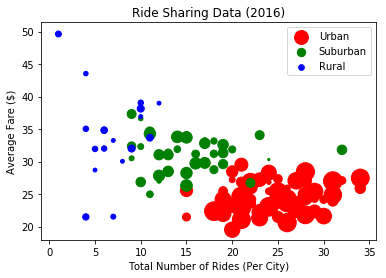

In [9]:
#Bubble plot creation
plt.scatter(urbanFinalTable['total_rides'],urbanFinalTable['avg_fare'], s =urbanFinalTable['total_drivers']*5,c='r',label='Urban', )
plt.scatter(suburbanFinalTable['total_rides'],suburbanFinalTable['avg_fare'], s =suburbanFinalTable['total_drivers']*5,c='g',label='Suburban', )
plt.scatter(ruralFinalTable['total_rides'],ruralFinalTable['avg_fare'], s =ruralFinalTable['total_drivers']*5,c='b',label='Rural', )
plt.legend(loc="best")

plt.title('Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

Text(32.9163,0.5,'Average Fare ($)')

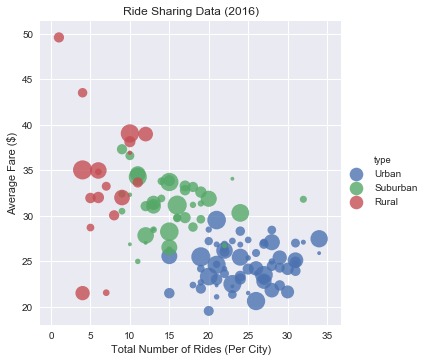

In [62]:
sns.lmplot(x='total_rides',y='avg_fare', data = finalTable, fit_reg =False ,legend =True, hue='type', scatter_kws={"s": finalTable['total_drivers']*5})
sns.set()
plt.title('Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


Text(0.5,0,'Total Fare')

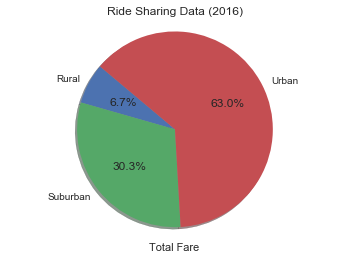

In [52]:
#  % of Total Fares by City Type
#Create combined table of both raw data with total fares, rides, and drivers

#Total fares
rideCityGroupby = rideRaw.groupby('city')
cityTotalFare = pd.DataFrame(rideCityGroupby['fare'].sum()).reset_index()


#Add total fares to the previous combined table
finalTable2 = finalTable.merge(cityTotalFare, how ='left', on='city')
finalTable2 = finalTable2.rename(columns ={'fare':'total_fare'})

#Groupby city type
cityTypeGroupby = finalTable2.groupby('type')
cityTypeTotalFare = cityTypeGroupby['total_fare'].sum()
cityTypeTotalFare = pd.DataFrame(cityTypeTotalFare).reset_index()
cityTypeTotalFare

plt.pie(cityTypeTotalFare['total_fare'], labels=cityTypeTotalFare['type'],autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('Ride Sharing Data (2016)')
plt.xlabel("Total Fare")


Text(0.5,0,'Total Rides')

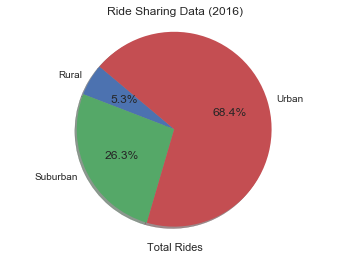

In [53]:
#   % of Total Rides by City Type
cityTypeTotalRide = cityTypeGroupby['total_rides'].sum()
cityTypeTotalRide = pd.DataFrame(cityTypeTotalRide).reset_index()
cityTypeTotalRide.head()

plt.pie(cityTypeTotalRide['total_rides'], labels=cityTypeTotalRide['type'],autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('Ride Sharing Data (2016)')
plt.xlabel("Total Rides")


Text(0.5,0,'Total Drivers')

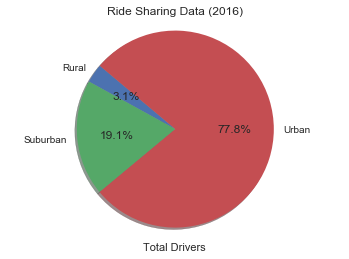

In [54]:
#    % of Total Drivers by City Type
cityTypeTotalDriver = cityTypeGroupby['total_drivers'].sum()
cityTypeTotalDriver = pd.DataFrame(cityTypeTotalDriver).reset_index()
cityTypeTotalDriver

plt.pie(cityTypeTotalDriver['total_drivers'], labels=cityTypeTotalDriver['type'],autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('Ride Sharing Data (2016)')
plt.xlabel("Total Drivers")

Insights:
1. Urban has the most drivers but not the percentage of total drivers is not the same percentage in rides or total fare. The demand for rides in urban area is lower than the supply.
2. Rural has the opposite trend than Urban, there is low percentage of drivers but higher in terms of rides.
3. The spread of average fare for Rural is greater than the spread of Urban. It goes back to Rural having a low supply of drivers which posisbly drives up the average fare. 